<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/51_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [67]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

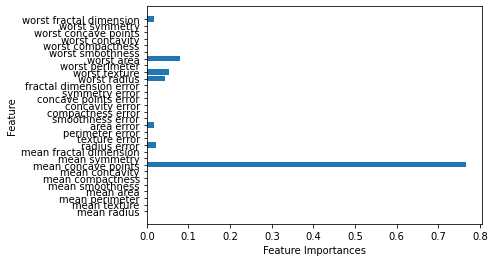

In [68]:
def feature_importances(model, d_sklearn):

  n_feature = d_sklearn.data.shape[1]
  plt.barh(range(n_feature), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_feature), d_sklearn.feature_names)
  plt.xlabel('Feature Importances')
  plt.ylabel('Feature')

feature_importances(tree, cancer)

In [69]:
import pandas as pd

url = r'https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/master/data/ram_price.csv'

df = pd.read_csv(url)

df.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


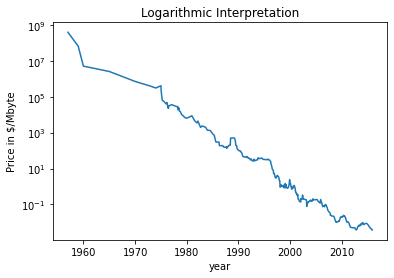

In [70]:
plt.semilogy(df.date, df.price)
plt.xlabel('year')
plt.ylabel('Price in $/Mbyte')
plt.title('Logarithmic Interpretation')
plt.show()

In [71]:
url2 = r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/shootings.csv'

df_2 = pd.read_csv(url2)

df_2.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

df.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [73]:
data_train = df[df.date < 2000]
data_test = df[df.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)
lin_reg = LinearRegression().fit(X_train, y_train)

X_all = df.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lin_reg = lin_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lin_reg = np.exp(pred_lin_reg)

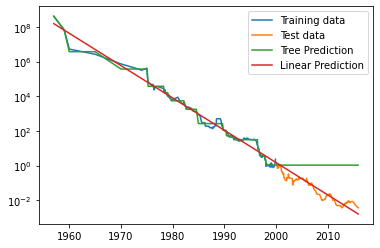

In [74]:
plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(df.date, price_tree, label='Tree Prediction')
plt.semilogy(df.date, price_lin_reg, label='Linear Prediction')
plt.legend(loc='best')
plt.savefig('Price_and_date_log.png')
plt.show()

In [85]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier

X, y = make_moons(noise=.25, n_samples=100, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)

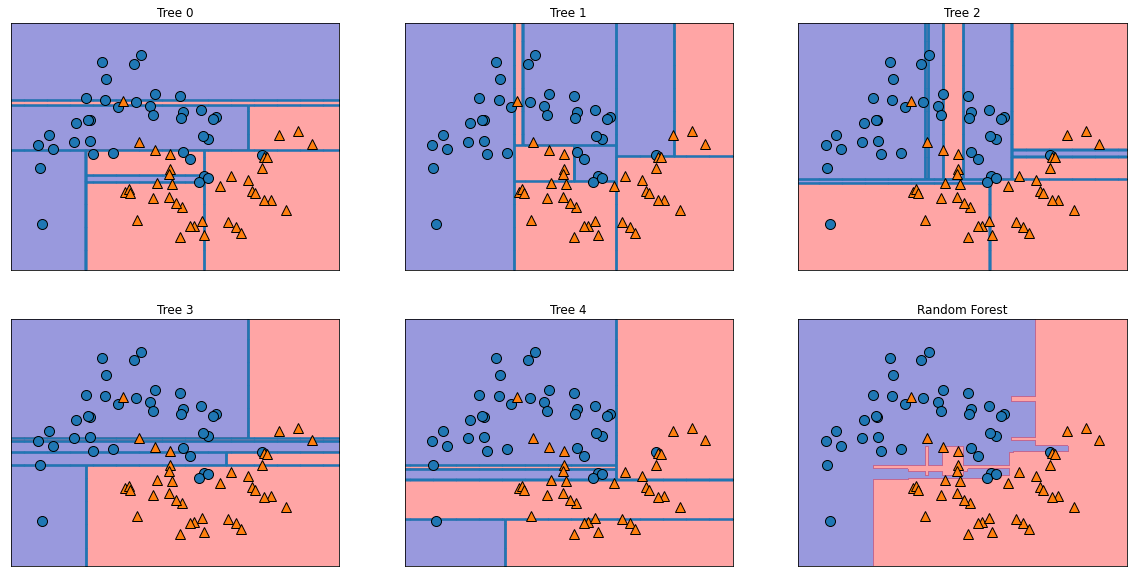

In [89]:
import mglearn

fig, axes = plt.subplots(2, 3, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):

  ax.set_title('Tree {}'.format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1], alpha=.4)

axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)


     |████████████████████████████████| 542kB 2.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=d0e14343b7102e764e7ce694273cbd5368e0f50c52312ce5e88f28e8635e8de1
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn
